# Training a neural Network to read the MNIST Dataset 
### Conor O'Reilly - G00338592

## Imports

In [57]:
# Adapted From https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# Adapted From https://medium.com/coinmonks/handwritten-digit-prediction-using-convolutional-neural-networks-in-tensorflow-with-keras-and-live-5ebddf46dc8
# Adapted from https://www.tensorflow.org/guide/keras/save_and_serialize
# imports 
import tensorflow as tf
from tensorflow import keras
import numpy as np

# import the mnist dataset from keras
from keras.datasets import mnist
# matplotlib used to visualise the data
import matplotlib.pyplot as plt
# Importing the required Keras modules containing model and layers
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Loading in the dataset and printing out some  data & images


In [58]:
# Loading in the dataset
# x_train is the image of number, y_train is the number the image contains
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
# (Amount of images in the dataset, Rows of pixels, Cols of pixels)
x_train.shape

(60000, 28, 28)

5


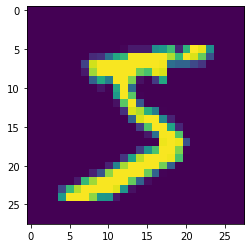

In [60]:
%matplotlib inline 
image_index = 0
print(y_train[image_index])
# Prints out the first image as it appears in the file
plt.imshow(x_train[image_index])

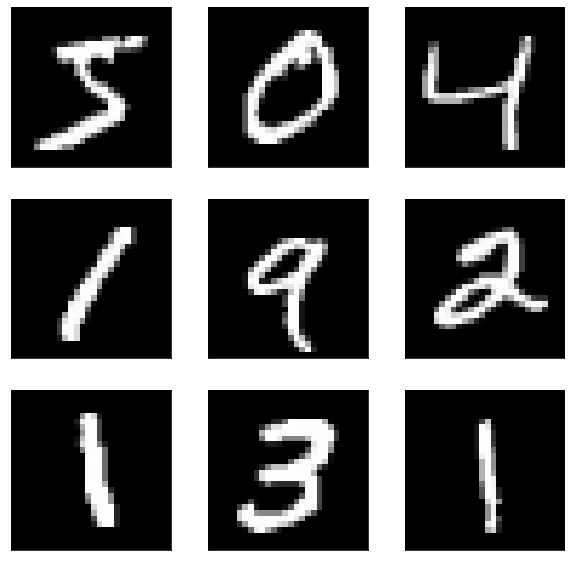

In [61]:
# Plot out the first nine images in the test set 
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="gray")
plt.show()

In [71]:
# The input shape that the CNN expects is a 4D Array - batch, height, width, channels
# The channels show whether the image is greyscaled or coloured
# 1 is given because greyscaled images are being used (3 for coloured)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# input: 28*28 pixels with 1 channel -> (28,28,1) tensors.
input_shape = (28, 28, 1)

# Type float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
# dataset has each pixel between 0-255, it is now 0-1
# http://aishack.in/tutorials/normalized-rgb/
x_train /= 255
x_test /= 255

# print outs
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Creating a Sequential Model and adding the layers

### Creating a sequential model
[Keras sequential model guide](https://keras.io/getting-started/sequential-model-guide/)
* The Sequential model is a linear stack of layers. 
* Layers are added via the add. method 

```python
model = Sequential()```


### 2D Convolution layer (e.g. spatial convolution over images)
[Keras pooling docs](https://keras.io/layers/pooling/)
[Keras Sequential model guide](https://keras.io/getting-started/sequential-model-guide/)
* This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
* in the first layer, you must specify the expected input data shape
* This applies 28 convolution filters of size 3x3 each

```python
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))```


### Max pooling operation for spatial data.
[Keras pooling docs](https://keras.io/layers/pooling/)
* The pool size halves the input in both spatial dimension (vertical, horizontal).
* The numbers input to the pool size are the factors by which to downsize

```python 
model.add(MaxPooling2D(pool_size=(2, 2)))```

* **(None, 26, 26, 28) -> (None, 13, 13, 28)**

### Flatten layer
* Flattens the input. Does not affect the batch size.

```python
model.add(Flatten())```

* **(None, 13, 13, 28) -> (None, 4732)**


### Densely-Connected Layer.
* Dense(128) is a fully-connected layer with 128 hidden units. 

```python
model.add(Dense(128, activation=tf.nn.relu))```

* **(None, 4732) * 128 -> 605824**  

### Dropout Layer
[Keras layers docs](https://keras.io/layers/core/)
* Applies Dropout to the input.
* Used to prevent overfitting the model by dropping a fraction rate (0.2) of inputs to 0

```python
model.add(Dropout(0.2))```

### Second Dense Layer with Softmax Activation
[](https://medium.com/@zhang_yang/number-of-parameters-in-dense-and-convolutional-neural-networks-34b54c2ec349)

```python
model.add(Dense(10,activation=tf.nn.softmax))```

* **10 * (128 + 1) -> 1290**

In [63]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [64]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 45s 748us/step - loss: 0.1967 - accuracy: 0.9412


In [65]:
# Returns the loss value & metrics values for the model in test mode.
# https://keras.io/models/model/
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 254us/step


[0.07661983152255417, 0.9771000146865845]

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [67]:
# Save predictions for future checks
#predictions = model.predict(x_test)

In [68]:
model_json = model.to_json()

with open("Model/model.json", "w") as json_file:
  json_file.write(model_json)



# Save the weights
model.save('../FlaskWebApp/model.h5')

In [21]:
#new_model = keras.models.load_model('../FlaskWebApp/model.h5')

In [ ]:
#predictions = new_model.predict([x_test])

# print('x_test shape', [x_test])

# use numpy to help make a prediction on x_test set
#print('At predictions index 0, number is a ', np.argmax(predictions[4]))

In [ ]:
# prints out the first image in the test dataset
#plt.imshow(x_test[4].reshape(28, 28), cmap=plt.cm.binary)